# Combined Test File for all Quantum Algorithms
**By**: Arjun Bhamra

## Imports

In [14]:
import qiskit as q
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram

## Quantum Teleporter for $n$ qubits

This code works by taking a list of $n$ unique qubit states that someone wants to be teleported, and sending them from Alice to Bob.

In [13]:
import Quantum_Teleporter
from Quantum_Teleporter import QuantumTeleporter

psi = np.array([0.5533920757991503+0.3043529040180291j, 0.6147796854942953+0.4724113234904887j])    
psi2 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
input_states = np.array([psi, psi2]) 
# print(input_states)
# teleportation_circuit(input_states)

q_teleport = QuantumTeleporter(input_states)
q_teleport.teleportation_circuit()

2 state Quantum Teleporter Created
Psi state:  (0.5533920757991503+0.3043529040180291j) (0.6147796854942953+0.4724113234904887j)
Alice's state:  (0.5533920757991503+0.3043529040180291j) (0.6147796854942953+0.4724113234904887j)
Bob's state:  (0.5533920757991504+0.30435290401802917j) (0.6147796854942953+0.47241132349048853j)
State Successfully Teleported!
Psi state:  (0.7071067811865475+0j) (0.7071067811865475+0j)
Alice's state:  (0.7071067811865475+0j) (0.7071067811865475+0j)
Bob's state:  (0.7071067811865474+0j) (0.7071067811865476-8.659560562354934e-17j)
State Successfully Teleported!


## Quantum Teleporter Code (only for 1 qubit state instead of $n$ states)
### (Only serves as an example and to visualize the functioning circuit)

Psi state:  (0.5533920757991503+0.3043529040180291j) (0.6147796854942953+0.4724113234904887j)
Alice's state:  (0.5533920757991503+0.3043529040180291j) (0.6147796854942953+0.4724113234904887j)
Bob's state:  (0.5533920757991502+0.30435290401802906j) (0.6147796854942955+0.4724113234904887j)
State Successfully Teleported!


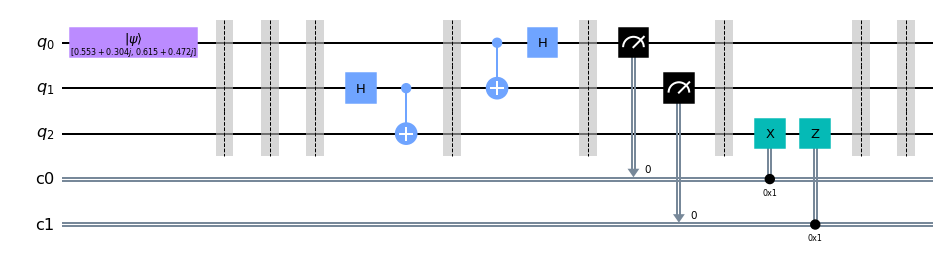

In [16]:
#QUANTUM TELEPORTATION

# Create a Quantum Circuit with 3 quantum wires and two classical wires
qr = q.QuantumRegister(3, 'q')
c0 = q.ClassicalRegister(1, 'c0')
c1 = q.ClassicalRegister(1, 'c1')

qc = q.QuantumCircuit(qr, c0, c1)

#the state we'd like to teleport
psi = np.array([0.5533920757991503+0.3043529040180291j, 0.6147796854942953+0.4724113234904887j])

init_gate = q.extensions.Initialize(psi)

#ansatz/initial state
qc.append(init_gate, [0])

qc.barrier()

qc.snapshot('1')

qc.barrier()

#create bell pairs
qc.h(1)
qc.cx(1, 2)

qc.barrier()

#alice's gates
qc.cx(0, 1)
qc.h(0)

qc.barrier()

#measurements
qc.measure(0, c0)
qc.measure(1, c1)

qc.barrier()

qc.x(2).c_if(c0, 1)
qc.z(2).c_if(c1, 1)

qc.barrier()

qc.snapshot('2')

#qc.draw('mpl')
# # Execute the circuit on the statevector simulator

simulator = Aer.get_backend('statevector_simulator')

# job = execute(qc, simulator, shots=1000)
job = q.execute(qc, simulator)

# Grab results from the job
result = job.result()
snapshots = result.data()['snapshots']['statevector']

init_state = snapshots['1']
final_state = snapshots['2']

# # Returns counts
# counts = result.get_counts(qc)
# print("\nTotal count for 00 and 11 are:",counts)

def check_same_state(alice, bob, psi):
    a = alice[0]
    b = [c for c in bob[0] if c != 0]
    print("Psi state: ", psi[0], psi[1])
    print("Alice's state: ", a[0], a[1])
    print("Bob's state: ", b[0], b[1])
    # For simplicity I am rounding and summing to check for equality
    if np.round(a[0]+a[1], 5) == np.round(b[0]+ b[1], 5):
        print("State Successfully Teleported!")
    else:
        print("Error: Bob did not get the right state!")

# Check if it's the same state
check_same_state(init_state, final_state, psi)

# Draw the circuit
qc.draw('mpl')

## Superdense Coding
Using one qubit to send two classical bits of information (i.e., $00, 01, 10, 11$, which are equal to $0, 1, 2,$ and $3$.

What is your code? Options: 00, 10, 01, 11 -->  01


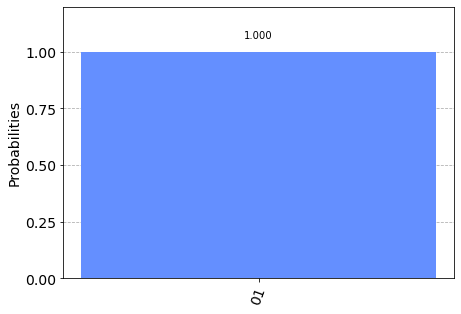

In [22]:
#SUPERDENSE CODING W/QUBITS

#Defining things
qr = q.QuantumRegister(2, 'q')
#cr = q.ClassicalRegister(1, 'cr')
#qc = q.QuantumCircuit(qr, cr)
qc = q.QuantumCircuit(qr)

def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")
        msg == "00"

#state prep
qc.h(0)
qc.cx(0, 1)

qc.barrier()

msg = input("What is your code? Options: 00, 10, 01, 11 --> ")

encode_message(qc, 0, msg)

qc.barrier()

#use the bell state measurement!
qc.cx(0, 1)
qc.h(0)

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
#qc.draw('mpl')

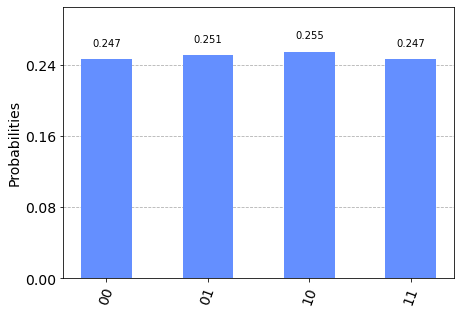

In [75]:
#HADAMARD TRANSFORM

qc = q.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
#qc.draw('mpl')

simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)